# JPMorgan: Quantitative Research Job Simulation

## Task 2: Commodity Storage Contract Valuation

### Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading File + Overview

In [5]:
nat_gas = pd.read_csv("Nat_Gas.csv")
nat_gas['Dates'] = pd.to_datetime(nat_gas['Dates'])
nat_gas.set_index('Dates', inplace=True)

# Quick check
print(nat_gas.head())
print(nat_gas.tail())

            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9
            Prices
Dates             
2024-05-31    11.4
2024-06-30    11.5
2024-07-31    11.6
2024-08-31    11.5
2024-09-30    11.8


/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_9110/1332904075.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas['Dates'] = pd.to_datetime(nat_gas['Dates'])


### Function Implementation

In [6]:
def contract(inj_dates, wdw_dates, inj_cost, wdw_cost, trsprt_cost, max_inj_rate, max_wdw_rate):
    inj_prices = nat_gas.loc[inj_dates]['Prices']
    wdw_prices = nat_gas.loc[wdw_dates]['Prices']

    injection_total = 0
    for i in range(len(inj_prices)):
        injection_total += inj_prices[i] * max_inj_rate
    
    withdrawal_total = 0
    for i in range(len(wdw_prices)):
        withdrawal_total += wdw_prices[i] * max_wdw_rate
    
    margin = withdrawal_total - injection_total
    
    stor_time = pd.date_range(start=inj_dates[0], end=wdw_dates[-1], freq='ME') # Calculate time span for storage cost
    stor_cost_total = len(stor_time) * stor_cost
    
    transpt_cost_total = trsprt_cost * (len(inj_dates) + len(wdw_dates)) # Calculate total transport costs

    contract_value = margin - (stor_cost_total + transpt_cost_total) # Final contract value
    return contract_value

### Parameters

In [7]:
# Test inputs
inj_dates = ['2021-06-30','2021-07-31','2021-08-31']
wdw_dates = ['2021-10-31','2021-11-30','2021-12-31']
inj_cost = 10000  # injection cost ($)
wdw_cost = 10000  # withdrawal cost ($)
trsprt_cost = 5000  # transport cost ($)
max_inj_rate = 500000  # injection rate (BTU per month)
max_wdw_rate = 500000  # withdrawal rate (BTU per month)
stor_cost = 100000  # storage cost ($ per month)


In [8]:

value = contract(inj_dates, wdw_dates, inj_cost, wdw_cost, trsprt_cost, max_inj_rate, max_wdw_rate)
print("Contract Value:", value)


Contract Value: 420000.0


/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_9110/3152910137.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  injection_total += inj_prices[i] * max_inj_rate
/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_9110/3152910137.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  withdrawal_total += wdw_prices[i] * max_wdw_rate


###   Visualization

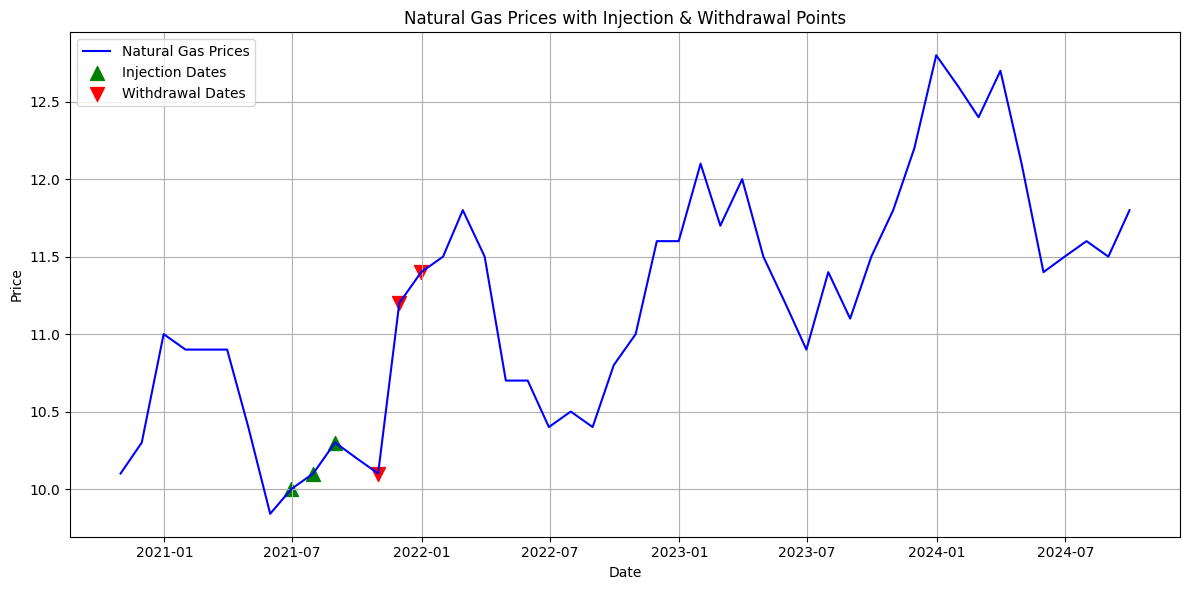

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(nat_gas.index, nat_gas['Prices'], label='Natural Gas Prices', color='blue')


inj_x = pd.to_datetime(inj_dates)
wdw_x = pd.to_datetime(wdw_dates)

plt.scatter(inj_x, nat_gas.loc[inj_x]['Prices'], color='green', marker='^', s=100, label='Injection Dates')
plt.scatter(wdw_x, nat_gas.loc[wdw_x]['Prices'], color='red', marker='v', s=100, label='Withdrawal Dates')

plt.title('Natural Gas Prices with Injection & Withdrawal Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
